In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from pyramid.arima import auto_arima

from Sloth import Sloth
Sloth = Sloth()

/home/jgleason/.local/lib/python3.5/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)
Using TensorFlow backend.


In [3]:
# read in different datasets

# electronic production data
data_electronic = pd.read_csv("datasets/Electronic_Production.csv",index_col=0)
data_electronic.index = pd.to_datetime(data_electronic.index)

# Beijing temperature data
data_temp = pd.read_csv("datasets/PRSA_data_2010.1.1-2014.12.31.csv",index_col=0)
data_temp = data_temp.groupby(['year', 'month']).mean()
data_temp = data_temp['TEMP']

# sunspots data
data_sun = pd.read_csv("datasets/learningData.csv",index_col=0)
data_sun = data_sun['sunspot.year'].dropna()


In [4]:
# function that plots time series data
# parameters:
#     input_data:                input data frame to plot
#     title:                     string to represent time series data, to be used as title / ylabel

def plot_data(input_data, title):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.plot(input_data.values, "k-")
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.title(title)
 
# function that plots time series seasonal decomposition
# parameters:
#     input_data:                input data frame 
#     frequency:                 frequency, or periodicity, of the time series
def plot_seasonal(input_data, *frequency):
    if not frequency:
        result = Sloth.DecomposeSeriesSeasonal(input_data.index, input_data.values)
    else:
        result = Sloth.DecomposeSeriesSeasonal(input_data.index, input_data.values, frequency[0])
    fig = result.plot()
    plt.show()

# function that makes a future forecast for time series data
# parameters:
#     train:                     input training data frame
#     test:                      input testing data frame
#     seasonal:                  boolean; whether data has seasonal component
#     seasonal_differencing      period for seasonal differencing

def future_forecast(train, test, seasonal, *seasonal_differencing):
    
    print("DEBUG::the size of test is:")
    print(test.shape)
    
    if not seasonal_differencing:
        future_forecast = Sloth.PredictSeriesARIMA(train,test.shape[0],seasonal)
    else:
        future_forecast = Sloth.PredictSeriesARIMA(train,test.shape[0],seasonal, seasonal_differencing[0])

    print("DEBUG::Future forecast:")
    print(future_forecast)

    future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=["Prediction"])
    return future_forecast


# function that plots time series data
# parameters:
#     input_data:                input data frame to plot
#     future_forecast:           future forecast for time series data
#     title:                     string to represent time series data, to be used as title / ylabel
def plot_future_forecast(input_data, test, future_forecast, title):
    plt.subplot(2, 1, 1)
    plt.plot(pd.concat([test,future_forecast],axis=1).values)
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.title(title)

    plt.subplot(2, 1, 2)
    plt.plot(pd.concat([input_data,future_forecast],axis=1).values)
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.show()
        

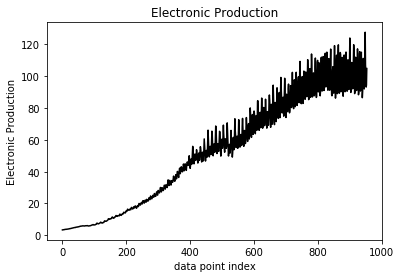

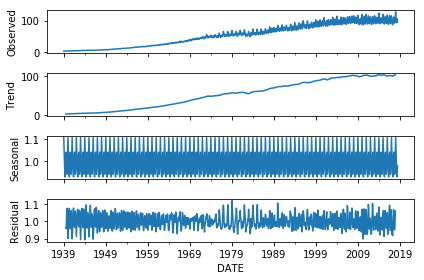

DEBUG::the size of test is:
(191, 1)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2452.673, BIC=2475.774, Fit time=4.769 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2792.031, BIC=2801.271, Fit time=0.056 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2640.955, BIC=2659.436, Fit time=1.003 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2541.226, BIC=2559.706, Fit time=1.333 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2454.341, BIC=2482.061, Fit time=6.047 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2671.983, BIC=2690.463, Fit time=2.631 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=2454.192, BIC=2481.913, Fit time=11.039 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2454.291, BIC=2486.631, Fit time=20.067 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2444.747, BIC=2472.467, Fit time=6.0

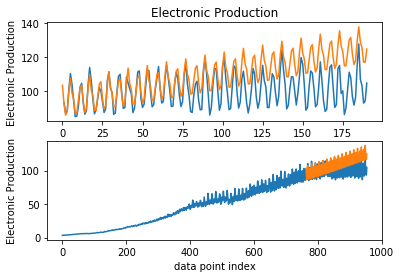

In [21]:
# plots and forecasting for electronic production
plot_data(data_electronic, "Electronic Production")
plot_seasonal(data_electronic, 12)

# use 80% of data as training data
train_split = int(.8 * len(data_electronic))
train = data_electronic[:train_split]
test = data_electronic[train_split:]
future_forecast_electronic = future_forecast(train, test, True, 12)
plot_future_forecast(data_electronic, test, future_forecast_electronic, 'Electronic Production')

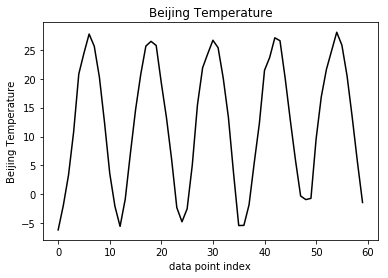

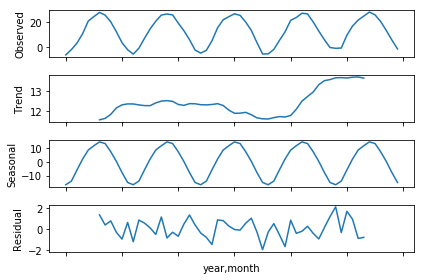

DEBUG::the size of test is:
(12,)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=148.322, BIC=151.432, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=145.034, BIC=151.255, Fit time=0.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=148.863, BIC=153.529, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=136.595, BIC=144.371, Fit time=0.952 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=137.590, BIC=143.812, Fit time=0.390 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=134.625, BIC=143.957, Fit time=0.798 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=

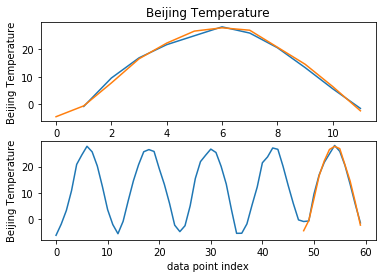

In [36]:
# plots and forecasting for Beijing weather data
plot_data(data_temp, "Beijing Temperature")
plot_seasonal(data_temp, 12)
# use 80% of data as training data
train_split = int(.8 * len(data_temp))
train = data_temp[:train_split]
test = data_temp[train_split:]
future_forecast_temp = future_forecast(train, test, True, 12)
plot_future_forecast(data_temp, test, future_forecast_temp, 'Beijing Temperature')

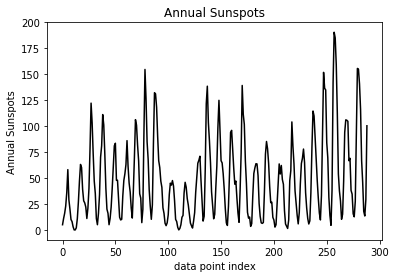

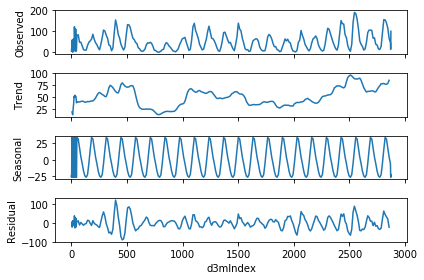

DEBUG::the size of test is:
(29,)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 11); AIC=2166.280, BIC=2183.847, Fit time=1.862 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 11); AIC=2255.895, BIC=2262.922, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 11); AIC=2199.514, BIC=2213.568, Fit time=0.655 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 11); AIC=2169.950, BIC=2184.003, Fit time=0.684 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 11); AIC=2159.686, BIC=2180.766, Fit time=2.077 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 11); AIC=2196.167, BIC=2213.734, Fit time=0.705 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 11); AIC=2160.793, BIC=2185.387, Fit time=6.648 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 11); AIC=2233.950, BIC=2248.003, Fit time=0.197 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 11); AIC=2162.186, BIC=2190.294, Fit time=6.840 se

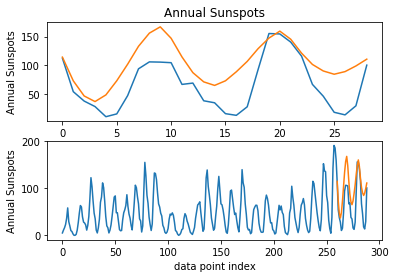

Root Mean Squared Error =  44.6020759138873
MIT RMSE = 30.9789


In [6]:
# plots and forecasting for sunspot data
from sklearn.metrics import mean_squared_error
import math
plot_data(data_sun, "Annual Sunspots")

# The solar cycle, which determines the number of observed sunspots has a period of 11 years
# (https://en.wikipedia.org/wiki/Solar_cycle). Therefore it's frequency (and its period for 
# seasonal differencing) is 11 years

# CONCLUSION -> period of seasonal differencing is very important, it's important for user to understand the
# periodicity of their time series for good prediction
plot_seasonal(data_sun, 11)

# use same training / testing splits as D3M prediction problem
train = data_sun[:260]
test = data_sun[260:]
future_forecast_sun = future_forecast(train, test, True, 11)
plot_future_forecast(data_sun, test, future_forecast_sun, 'Annual Sunspots')
print("Root Mean Squared Error = ", math.sqrt(mean_squared_error(test.values, future_forecast_sun)))
print("MIT RMSE = 30.9789")